In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_book = pd.read_csv("./Book_data/new_data/Ratings_5.csv",sep= ' ')
user_book

,User-ID,ISBN,Book-Rating
0,10664,3610,9
1,10664,1409,9
2,10664,4666,8
3,10664,106293,7
4,10664,106294,7
...,...,...,...
247623,10663,13069,10
247624,10663,14402,10
247625,10663,41120,10
247626,10663,33426,6


In [3]:
user_book.sort_values(by ="User-ID")

,User-ID,ISBN,Book-Rating
1167,0,62,8
1168,0,63,8
1169,0,64,7
1170,0,66,6
1171,0,67,10
...,...,...,...
1162,10739,6950,7
1163,10739,4045,7
1164,10739,62091,7
1165,10739,53165,6


##  EDA

In [5]:
user_interactions  = user_book["User-ID"].value_counts()
user_interactions_sorted = user_interactions.sort_values(ascending=False)
sorted_group_ids = user_interactions_sorted.index
sorted_interactions = user_interactions_sorted.values
sorted_interactions

array([5687, 5531, 1706, ...,    5,    5,    5], dtype=int64)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


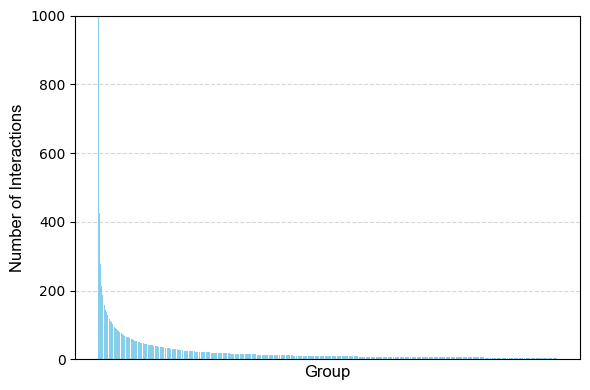

In [19]:
# 绘制柱状图
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,
}

plt.figure(figsize=(6,4), dpi=100)
plt.bar(range(len(sorted_group_ids)), sorted_interactions, color='skyblue')
plt.xlabel('Group',font1)

plt.ylabel('Number of Interactions', font1)  
plt.ylim(0, 1000)
# plt.title('Number of Interactions per User')
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('book_user_bar.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


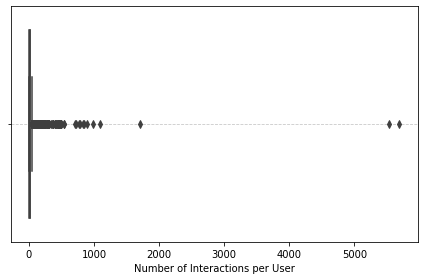

In [10]:
interactions_counts = user_interactions.values

# 绘制箱型图
plt.figure(figsize=(6, 4))
sns.boxplot(x=interactions_counts)
plt.xlabel('Number of Interactions per User')
# plt.title('Distribution of Interactions per User')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('book_user_box.eps', format='eps')
plt.show()

## The division of test set and training set

In [4]:
# 打乱顺序
import random
user_book = user_book.sample(frac=1,random_state = 666).reset_index(drop=True)
user_book

,User-ID,ISBN,Book-Rating
0,6292,105065,7
1,6956,86929,8
2,8011,65899,10
3,10143,1238,9
4,1217,36975,8
...,...,...,...
247623,1507,6718,6
247624,85,2872,10
247625,5043,22615,10
247626,1487,1711,10


In [5]:
len(user_book["User-ID"])

247628

In [6]:
# 抽取测试集和训练集
length = len(user_book['ISBN'])
len = 0
UserTrain = './Book_data/KA_Book/moocUserTrain.csv'
UserTest = './Book_data/KA_Book/moocUserTest.csv'

with open(UserTrain,'w') as object:
    for user,video in zip(user_book["User-ID"],user_book['ISBN']):
        len+=1
        if len < int(length * 0.90):
            object.write(str(user)+" ")
            object.write(str(video)+"\n")
    len=0 
    
with open(UserTest,'w') as object:
    for user,video in zip(user_book["User-ID"],user_book['ISBN']):
        len+=1
        if len >= int(length * 0.90):
            object.write(str(user)+" ")
            object.write(str(video)+"\n")
    len=0   

In [8]:
# 生成moocUser测试集的Negative样本
moocUserTest = pd.read_csv("./Book_data/KA_Book/moocUserTest.csv", header = None, sep=" ")
moocUserTest

,0,1
0,6147,47816
1,2075,33037
2,9330,9909
3,2848,88721
4,7234,64327
...,...,...
24759,1507,6718
24760,85,2872
24761,5043,22615
24762,1487,1711


In [11]:
u_v = set()
for user,video in  zip(user_book["User-ID"],user_book['ISBN']):
    u_v.add((user,video))

u_v    

{(3748, 87356),
 (3830, 67447),
 (8196, 2662),
 (4265, 53475),
 (6633, 51529),
 (4674, 44535),
 (2356, 59965),
 (5806, 33345),
 (3830, 69330),
 (1188, 36409),
 (5955, 48932),
 (1815, 54450),
 (5893, 451),
 (3830, 67769),
 (5086, 655),
 (399, 64450),
 (1950, 28),
 (1489, 43992),
 (7013, 22031),
 (2245, 31727),
 (399, 61863),
 (7739, 43749),
 (5051, 12072),
 (639, 85689),
 (9611, 5138),
 (2022, 5146),
 (4654, 706),
 (399, 106064),
 (6306, 368),
 (625, 3337),
 (10553, 19793),
 (6100, 10424),
 (4804, 15473),
 (4102, 33792),
 (4699, 103020),
 (5540, 54512),
 (6461, 88342),
 (2686, 45585),
 (3830, 64530),
 (4281, 4206),
 (9398, 24392),
 (9725, 31417),
 (9805, 17727),
 (5453, 9290),
 (1500, 44454),
 (2230, 59124),
 (6741, 72245),
 (9302, 98929),
 (4297, 9450),
 (699, 23911),
 (3399, 21854),
 (10035, 46722),
 (9265, 13974),
 (2399, 40685),
 (9983, 46073),
 (7064, 30315),
 (1204, 15076),
 (4054, 833),
 (263, 6359),
 (2153, 57068),
 (59, 1814),
 (7973, 62408),
 (6680, 71165),
 (7545, 69380),
 (3

In [12]:
f = open('./Book_data/KA_Book/moocUserNegative.csv','w',encoding='utf-8')
for user,video in zip(moocUserTest[0],moocUserTest[1]):
    text_p = []
    text_p.append((user,video))
    for i in str(text_p[0]):
        if i != ' ':
            f.write(i)
    for i in range(99):
        f.write(' ')
        j = np.random.randint(0, user_book['ISBN'].max() + 1)
        while (user,j) in u_v: # or j in video_vain
            j = np.random.randint(0, user_book['ISBN'].max() + 1)
        f.write(str(j))
    f.write('\n')
f.close()